In [3]:
import fcsfiles as fcs # Small one-man repo, likely has bugs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [75]:
def f_anomalous(tau, N, tauD):
    k = 4.1623
    alpha = 0.65
    return 1 + (1/N) * (1/(1+(tau/tauD)**alpha)) * (1/(1+((tau/tauD)**alpha)*(k**2)))**0.5

In [5]:
# Pool all yeast traces for each probe
# Ap4 -- Pak1-GFP
data = fcs.ConfoCor3Fcs('../data/2024_09_05-FCSandImg/Ap4_1nuc_unpolarized.fcs')
# Only need times_corr once. Will always be the same. 
times_corr = data['FcsData']['FcsEntry'][0]['FcsDataSet']['CorrelationArray'][:,0]

In [33]:
def get_corr(files, times_corr, clip=135):
    if type(files) == list:
        n_total = 0
        sum_corr = np.zeros(len(times_corr))
        for f in files:
            data = fcs.ConfoCor3Fcs(f'../data/2024_09_05-FCSandImg/{f}')
            n_samp = len(data['FcsData']['FcsEntry'])
            n_total += n_samp
            for i in range(n_samp):
                corr = data['FcsData']['FcsEntry'][i]['FcsDataSet']['CorrelationArray'][:,1]
                corr = corr - corr[clip] + 1
                sum_corr += corr
        avg_corr = sum_corr/n_total
    else:
        data = fcs.ConfoCor3Fcs(f'../data/2024_09_05-FCSandImg/{files}')
        n_total = len(data['FcsData']['FcsEntry'])
        sum_corr = np.zeros(len(times_corr))
        for i in range(n_total):
            corr = data['FcsData']['FcsEntry'][i]['FcsDataSet']['CorrelationArray'][:,1]
            corr = corr - corr[clip] + 1
            sum_corr += corr
        avg_corr = sum_corr/n_total
    return avg_corr, n_total

In [7]:
def get_mb(files):
    all_counts = []
    if type(files) == list:
        for f in files:
            data = fcs.ConfoCor3Fcs(f'../data/2024_09_05-FCSandImg/{f}')
            n_samp = len(data['FcsData']['FcsEntry'])
            for i in range(n_samp):
                counts = data['FcsData']['FcsEntry'][i]['FcsDataSet']['CountRateArray'][:,1]
                all_counts.append(np.mean(counts))
    else:
        data = fcs.ConfoCor3Fcs(f'../data/2024_09_05-FCSandImg/{files}')
        n_samp = len(data['FcsData']['FcsEntry'])
        for i in range(n_samp):
            counts = data['FcsData']['FcsEntry'][i]['FcsDataSet']['CountRateArray'][:,1]
            all_counts.append(np.mean(counts))
    return np.mean(all_counts)

In [8]:
V = 0.62578

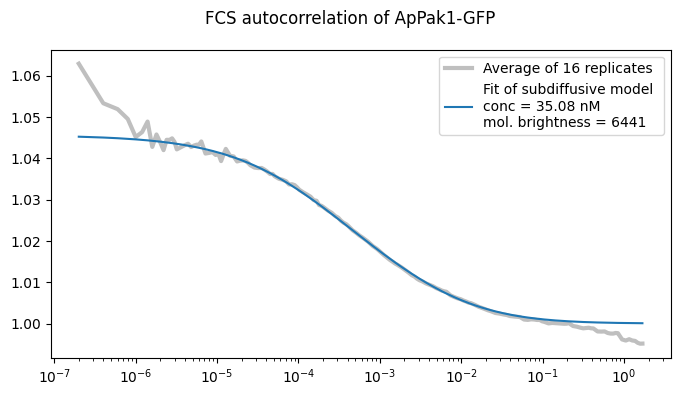

In [17]:
avg_corr, n_total = get_corr(["Ap4_1nuc_unpolarized.fcs", "Ap4_1nuc_polarized.fcs"], times_corr, clip=140)
title = "FCS autocorrelation of ApPak1-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:140], avg_corr[10:140], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb(["Ap4_1nuc_unpolarized.fcs", "Ap4_1nuc_polarized.fcs"])
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(mb/C)}")
axs.legend()

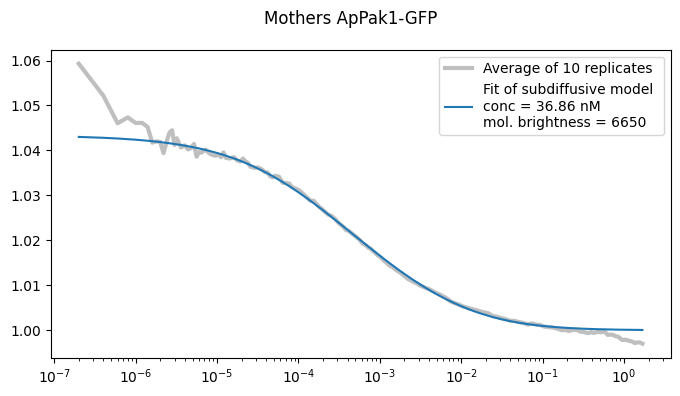

In [51]:
avg_corr, n_total = get_corr(["Ap4_mothers_polarized.fcs"], times_corr, clip=140)
title = "Mothers ApPak1-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:140], avg_corr[10:140], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb(["Ap4_mothers_polarized.fcs"])
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(mb/C)}")
axs.legend()

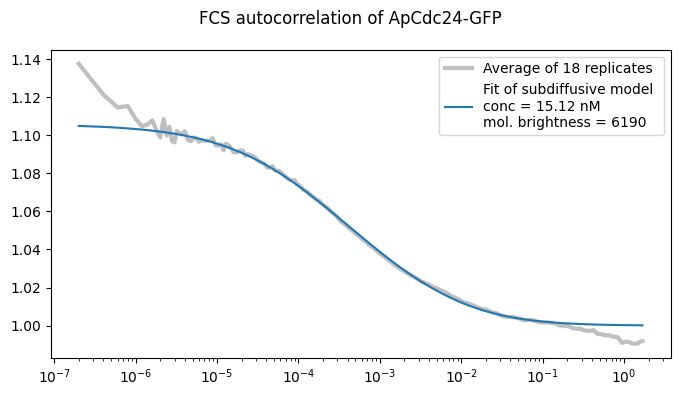

In [57]:
avg_corr, n_total = get_corr(["Ap5_1nuc_unpolarized.fcs", "Ap5_moreYeast.fcs"], times_corr, clip=140)
title = "FCS autocorrelation of ApCdc24-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:140], avg_corr[10:140], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb(["Ap5_1nuc_unpolarized.fcs", "Ap5_moreYeast.fcs"])
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(mb/C)}")
axs.legend()

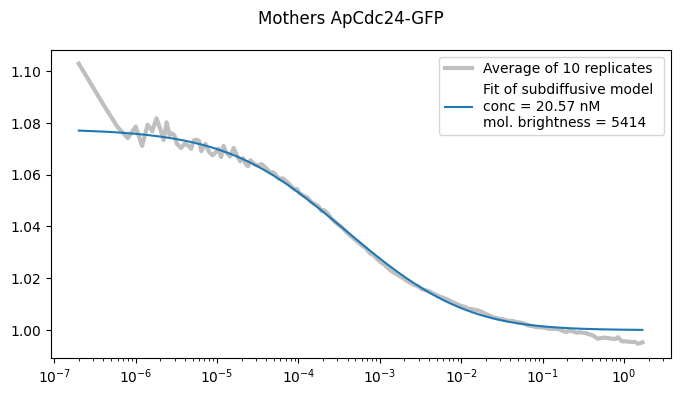

In [58]:
avg_corr, n_total = get_corr(["Ap5_mothers.fcs"], times_corr, clip=140)
title = "Mothers ApCdc24-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:140], avg_corr[10:140], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb(["Ap5_mothers.fcs"])
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(mb/C)}")
axs.legend()

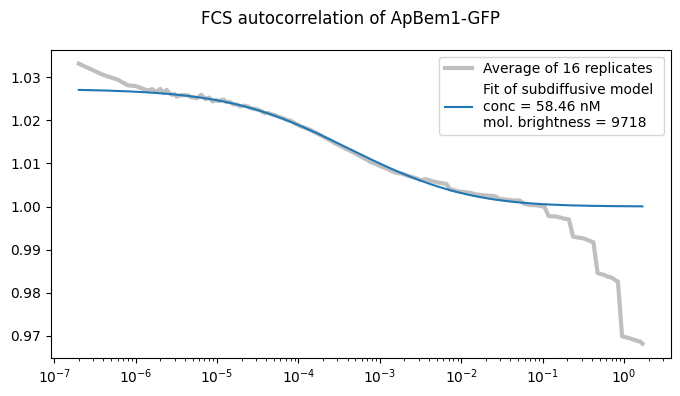

In [83]:
avg_corr, n_total = get_corr(["Ap6_yeast.fcs", "Ap6_polarizedYeast.fcs"], times_corr, clip=135)
title = "FCS autocorrelation of ApBem1-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb(["Ap6_yeast.fcs", "Ap6_polarizedYeast.fcs"])
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb,0)/C)}")
axs.legend()

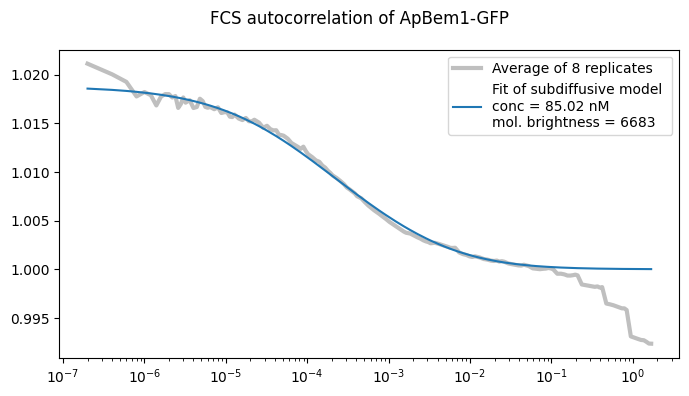

In [76]:
avg_corr, n_total = get_corr(["Ap6_mothers.fcs"], times_corr, clip=135)
title = "FCS autocorrelation of ApBem1-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb(["Ap6_yeast.fcs", "Ap6_polarizedYeast.fcs"])
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb,0)/C)}")
axs.legend()

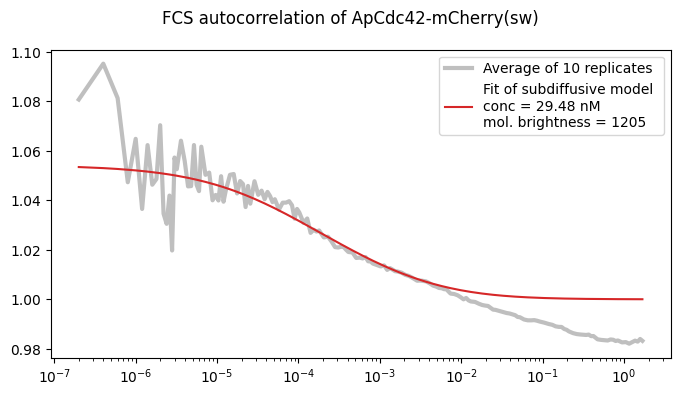

In [34]:
avg_corr, n_total = get_corr("Ap12_yeast.fcs", times_corr, clip=108)
title = "FCS autocorrelation of ApCdc42-mCherry(sw)"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb("Ap12_yeast.fcs")
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb,0)/C)}",
         color="C03")
axs.legend()

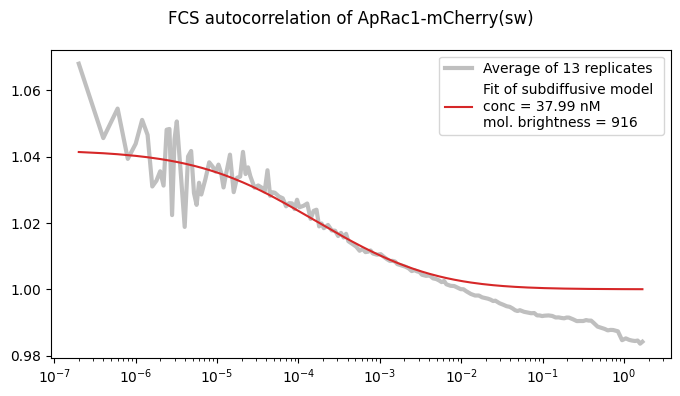

In [36]:
avg_corr, n_total = get_corr(["ApRac1_yeast.fcs","ApRac1_moreYeast.fcs"], times_corr, clip=108)
title = "FCS autocorrelation of ApRac1-mCherry(sw)"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = N/V
mb = get_mb("ApRac1_yeast.fcs")
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb,0)/C)}",
         color="C03")
axs.legend()

In [59]:
def f_anomalous2(tau, N, tauD):
    k = 4.1623
    alpha = 0.8
    return 1 + (1/N) * (1/(1+(tau/tauD)**alpha)) * (1/(1+((tau/tauD)**alpha)*(k**2)))**0.5

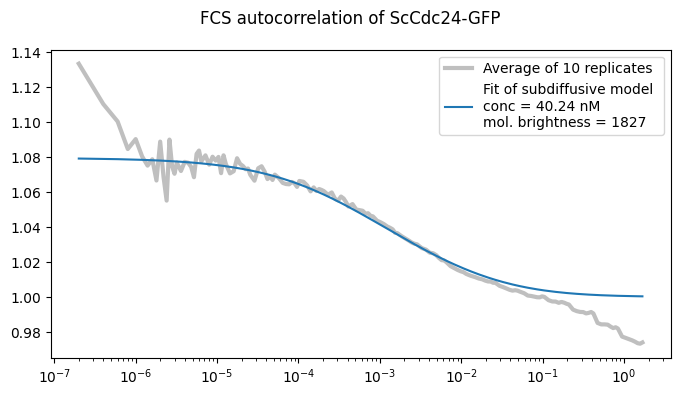

In [62]:
avg_corr, n_total = get_corr("Sc2_unbudded.fcs", times_corr, clip=135)
title = "FCS autocorrelation of ScCdc24-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
mb = get_mb("Sc2_unbudded.fcs")
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb*2,0)/C)}")
axs.legend()

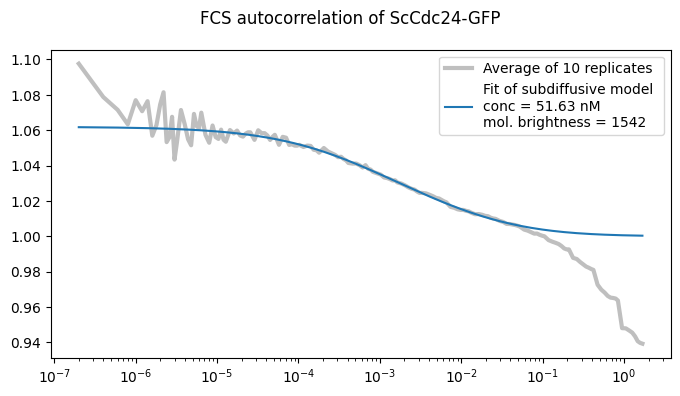

In [72]:
avg_corr, n_total = get_corr("Sc2_unbudded_0p2match.fcs", times_corr, clip=135)
title = "FCS autocorrelation of ScCdc24-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
mb = get_mb("Sc2_unbudded_0p2match.fcs")
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb*2,0)/C)}")
axs.legend()

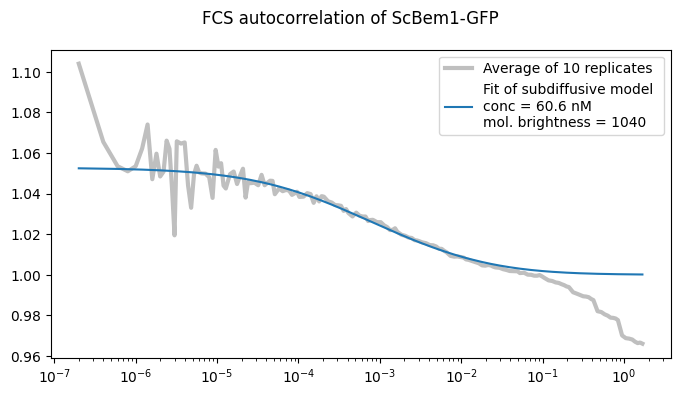

In [65]:
avg_corr, n_total = get_corr("Sc3_unbudded.fcs", times_corr, clip=130)
title = "FCS autocorrelation of ScBem1-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
mb = get_mb("Sc3_unbudded.fcs")
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb*2,0)/C)}")
axs.legend()

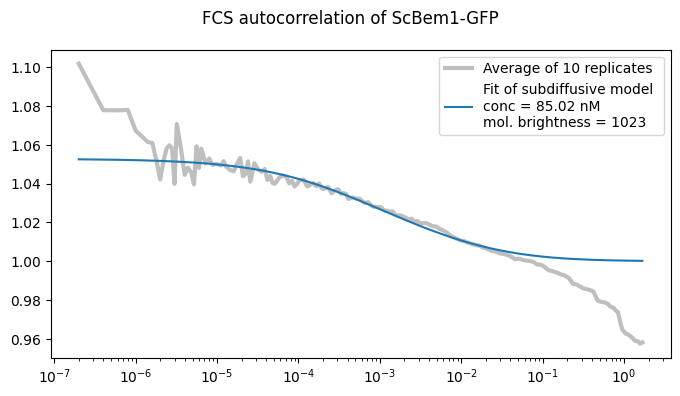

In [77]:
avg_corr, n_total = get_corr("Sc3_unbudded_0p2match.fcs", times_corr, clip=130)
title = "FCS autocorrelation of ScBem1-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
mb = get_mb("Sc3_unbudded_0p2match.fcs")
axs.plot(times_corr, f_anomalous(times_corr, *popt), 
         label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM \nmol. brightness = {int(round(mb*2,0)/C)}")
axs.legend()

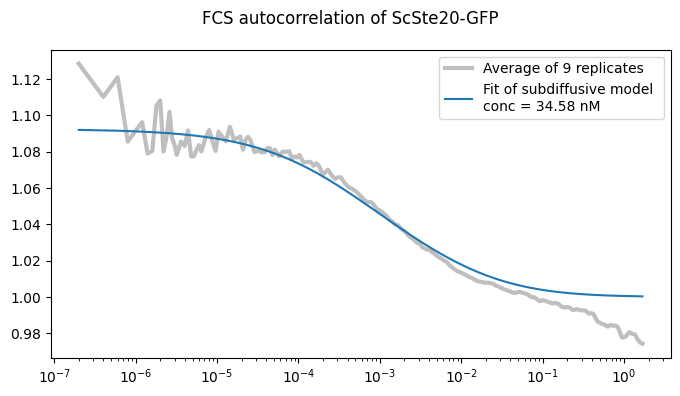

In [67]:
avg_corr, n_total = get_corr("Sc4_unbudded.fcs", times_corr, clip=130)
title = "FCS autocorrelation of ScSte20-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
axs.plot(times_corr, f_anomalous(times_corr, *popt), label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM")
axs.legend()

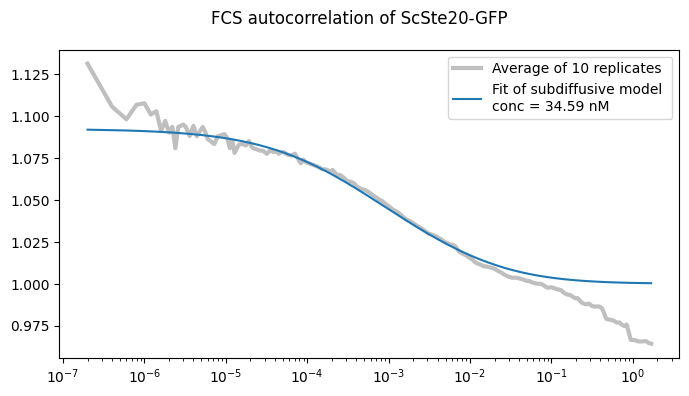

In [68]:
avg_corr, n_total = get_corr("Sc4_unbudded_0p2match.fcs", times_corr, clip=130)
title = "FCS autocorrelation of ScSte20-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
axs.plot(times_corr, f_anomalous(times_corr, *popt), label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM")
axs.legend()

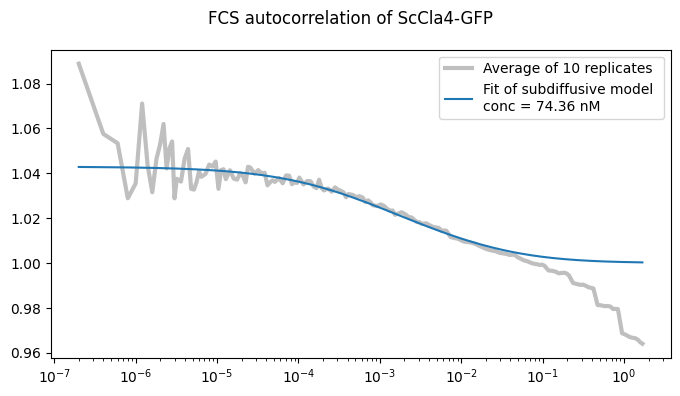

In [69]:
avg_corr, n_total = get_corr("Sc5_unbudded.fcs", times_corr, clip=130)
title = "FCS autocorrelation of ScCla4-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:135], avg_corr[10:135], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
axs.plot(times_corr, f_anomalous(times_corr, *popt), label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM")
axs.legend()

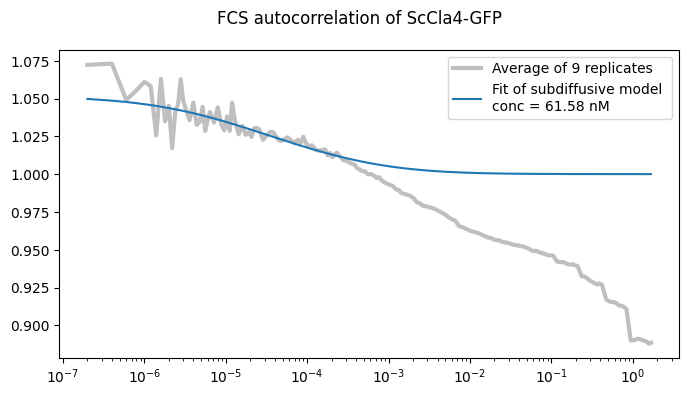

In [70]:
avg_corr, n_total = get_corr("Sc5_unbudded_0p2match.fcs", times_corr, clip=75)
title = "FCS autocorrelation of ScCla4-GFP"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:75], avg_corr[10:75], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
axs.plot(times_corr, f_anomalous(times_corr, *popt), label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM")
axs.legend()

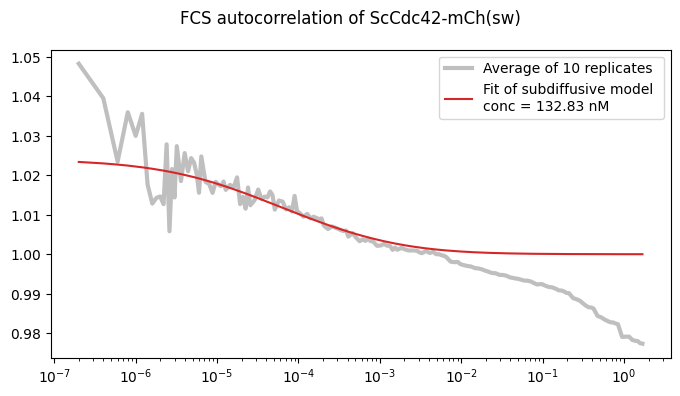

In [71]:
avg_corr, n_total = get_corr("Sc8_unbudded.fcs", times_corr, clip=100)
title = "FCS autocorrelation of ScCdc42-mCh(sw)"
fig, axs = plt.subplots(1, 1, figsize=(8,4))
fig.suptitle(title)
axs.set_xscale("log")
axs.plot(times_corr, avg_corr, linewidth=3, alpha=0.5, color="grey", label=f"Average of {n_total} replicates")

fit = curve_fit(f_anomalous, times_corr[10:100], avg_corr[10:100], bounds=(0,100))
popt, pcov = fit
N = popt[0]
C = (N/V)*2 # All Sc strains were diploids heterozygous for the -GFP allele
axs.plot(times_corr, f_anomalous(times_corr, *popt), label=f"Fit of subdiffusive model \nconc = {round(C, 2)} nM", c="C03")
axs.legend()